In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.4f}'.format

# Challenges in Machine Learning

## Agenda:
***
* What is Imbalanced Data
* Dealing with imbalanced data
    * Evaluation Metrics
    * Resampling Techniques
    * Algorithmic Techniques
* Dealing with small datasets
* Values of K in K-Fold validation
* Do we need hundreds of classifiers?

# Challenges in Machine Learning

## John and Lucius again
***
John and Lucius were finally out, in a nice looking pub, having drinks that were promised but never delivered to them. Having studied about all the cool algorithms, John was now pondering upon his journey. No amount of machine learning would have been able to predict his journey from house hunting to learning about ML algorithms. At least that's what he believed!

## John and Lucius again
***
John, now seriously considering a career in ML and data science started thinking about all the practical challenges ML professionals would come across. One of the first ones that came to his mind was: "What if the classes in a classification problem were really skewed towards one of the classes?" He told about this to Lucius. Lucius wanted to enjoy his drinks for once, but looking at John's enthusiasm, he realized that he had no choice. "Imbalanced Datasets", he muttered reluctantly and started explaining:

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Imbalanced Data
***

* Imbalanced Data is a slightly inaccurate term we use to describe datasets where the distribution of the target variable is imbalanced.
* This is most visible and easily detected for binary classification tasks, where most of the instances (data points) belong to one of the classes.


In [ ]:
eg of imbalance dataset --> classification task
Yes = 99 (not spam)
No = 1 (spam)

Fraud
Raining in summer

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Imbalanced Data
***
* Class-imbalance regularly occurs in datasets pertaining to multi-class classification tasks as well.
* Detecting it in Regression tasks can take a little more effort, and plotting a histogram of the target variable is a good starting point.

## Examples
***
Imbalanced datasets frequently occur in

* Anomaly detection
    * Electricity pilferage
    * Fraudulent transactions in banks
* Predicting Rare events
    * Ad click-through-rate (CTR) prediction (~1%)
    * Identification of rare diseases
    * User Churn (for example, usera churn is ~2% in telecom industry)


In [ ]:
123 - Not Fraud
123 - Fraud

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Understanding Imbalanced Data
***
Let's look at detection of credit card fraud to understand this in more detail, said Lucius recalling his encounter with such a problem.

* Credit card fraud is a widespread problem and accounts for millions of dollars in loss.
* But, given the extremely high number of credit card transactions everyday, fraudulent transactions represent only a small fraction.


* Even then, fraudulent transactions have an outsized impact on the revenue, because
* Almost the entire value of a fraudulent transaction counts towards loss (less insurance), whereas
* The profit from a genuine transaction is a fraction of the total transaction value.


* Thus it's more important to recall fraudulent transactions, even if that means we'll end up labeling some genuine transactions as fraud 
* This is more of a business call, actually, depending on a wide range of factors

In [ ]:
Type 1 and Type 2
H0 = Not fraud
Ha = Fraud

Type1 - Fraud when it was not a fraud - false alarm ! you may ending calling customer to confirm
Type2 - Not fraud when it was actually fraud 

alpha = 0.01 (you need a very strong evidence for you to conclude fraud)
alpha = 0.05
alpha = 0.1 (you may not need a very strong evidence)



* Even though the typical datasets recording credit card transaction are very large (millions of row), the number of fraudulent records tends to be a very small fraction of the datasets - around 1% to 2%.
* Thus, if a given dataset of credit card transactions has a million row, only about 10,000 of them will be from fraudulent transactions.

In [ ]:
No - 1000000
Yes - 10000

any pattern which was present from 10k gets overshadowed by the majority class
model ends up learning patterns only from dominant class

In [ ]:
95 - blue
5 - light blue

So what? blurted John, I can still train a model and try and predict if a transaction in fraudulent or not. Yes, you can, but that is likely to give you not-so-good results, said Lucius. Let me explain.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Consequences of imbalanced classes:
***
**Bias in the model towards dominant class**

* Most machine learning models will end up predicting most of the transactions as genuine as they end up learning from mostly positive instances.
* Accounting for this in the way the model sees the data (resampling strategies) or the way it learns (error metric, algorithmic tweaks) can help us build models that are better at predicting the minor class.



<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Consequences of imbalanced classes:
***
**Difficulty in assessing model performance**

* For the credit card dataset discussed before, if we classify all transactions as genuine, we might still have an accuracy of 99%! (Bias towards dominant class)
* Let's look at a problem we are more likely to encounter in practice. 
* Suppose we have built two models, A and B, to predict fraudulent transactions, and we want to select the one with better performance.



<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Consequences of imbalanced classes:
***
**Model A**

* Of the 99% genuine transactions, this model predicts 98.5% correctly
* Of the 1% fraudulent transactions, this model predicts 0.25% correctly

**Model accuracy: 98.75%**

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Consequences of imbalanced classes:
***
**Model B**
* Of the 99% genuine transactions, this model predicts 98.25% correctly
* Of the 1% fraudulent transactions, this model predicts 0.5% correctly

**Model accuracy: 98.75%**

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Consequences of imbalanced classes:
***
* **Which of these two models performs better?**
* **Which one of these two should we use?**


* Clearly Model B is more valuable to us, but Accuracy, one of the most common metrics used in classification, fails to reflect that.
* We need to use a metric that not only captures the class imbalance better, but one that also lets us make meaningful trade-offs between precision and recall.

"Hmmm... Interesting..." said John, scratching head, "So how do we deal with such a dataset?"

Lucius tried to recall a few techniques he studied in college. After some time he started:

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Dealing with Imbalanced Data
***
Here are the ways to handle the imbalanced data

* More suited error metrics (comparatively immune to class imbalance)
* Resampling strategies
* Algorithmic techniques
* Buy/Collect more data - wait for more fraud txns/wait for more ppl to fall sick

Let's look at them one by one.

## More Appropriate Error Metrics
***
The idea is to choose an error metric that is immune to class imbalance. As we saw earlier, accuracy is something that is not very robust against class imbalance. Following are a few examples of such error metrics

1. Confusion Matrix
2. Precision / Recall / Sensitivity / Specificity
3. AUC ROC - PR AUC
4. f1 Score
5. Cohen's Kappa



We have already gone through all the metrics, except Cohen's kappa. So let's understand Cohen's kappa better.

In [ ]:
Cohen’s Kappa 
How good your classifier power is in comparison to random classifier

100 records
2 ways to classifiy 
1. learn the pattern and then classify
2. randomly classify

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Cohen’s Kappa:
***
* The Kappa statistic (or value) is a metric that compares an Observed Accuracy (your classifier) with an Expected Accuracy (random chance). 
* Let's understand how Cohen's kappa is defined using a confusion matrix
![](../images/image20.png)

* Here, let's say rows (A) are the predicted values and columns (B) are the actual values.
* Now let's understand observed accuracy and expected accuracy.

* Observed Accuracy is simply the number of instances that were classified correctly throughout the entire confusion matrix.

![](../images/image20.png)
![](../images/image19.png)

* Expected Accuracy is defined as the accuracy that any classifier would be expected to achieve by random chance.

Sounds confusing? Let's break this down.

Our classifier classifies 
* (a + b) observations as yes
* (c + d) observations as no


* Hence, the probability of a randomly chosen observation being classified as yes is (P1): (a + b) / (a + b + c + d)
* And, the probability of a randomly chosen observation being classified as no is (P2): (c + d) / (a + b + c + d)

Reality:
* (a + c) observations as yes
* (b + d) observations as no


* Hence, the probability of a randomly chosen observation being classified as yes is (P3): (a + c) / (a + b + c + d)
* And, the probability of a randomly chosen observation being classified as no is (P4): (b + d) / (a + b + c + d)

In [ ]:
P1 (Your classifier) = Prob of saying Yes
P2 (Your classifier) = Prob of saying No

P3 (Truth) = Prob of saying Yes
P4 (Truth) = Prob of saying No

Probability of a randomly chosen sample being *CORRECTLY* classified is 

* when the classifier classifies it as yes AND it is in reality yes: P1*P3
* when the classifier classifies it as no AND it is in reality no: P2*P4

Hence, Expected probability of a randomly chosen sample being *CORRECTLY* classified is: P1 x P3 + P2 x P4

![](../images/image20.png)
![](../images/image23.png)

![](../images/image20.png)
![](../images/image23.png)
![](../images/image22.png)
![](../images/image21.png)

Great! now that we understand $P_o$ and $P_e$, Cohen's kappa is defined as

![](../images/image24.png)

In [ ]:
ideal = 1
as high as possible
how much of impact your business can take
10 fraud - 8


* In essence, the kappa statistic is a measure of how closely the instances classified by the machine learning classifier matched the data labeled as ground truth, controlling for the accuracy of a random classifier as measured by the expected accuracy. 
* Not only can this kappa statistic shed light into how the classifier itself performed, the kappa statistic for one model is directly comparable to the kappa statistic for any other model used for the same classification task.
* For any arbitrary accuracy value, more the Kappa value, better the performance.

Q: Here is an example of 2 classifiers with given confusion matrix. Which one do you think is performing better? 

**Classifier A**

![](../images/image25.png)

**CLassifier B**

![](../images/image27.png)

A: It is apparent that for given accuracy, classifier A is doing a much better job at classifying than classifier B, which is also reflected in higher Kappa value attained by classifier A

"Wow! that is an interesting metric to use!" said John. What else we can do? Lucius again went searching the attics of his mind, looking for some other techniques he had studies. And started recalling the resampling techniques.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Resampling Techniques
***

Resampling methods are techniques in which , we try to **reduce the proportion of the dominant class by undersampling** from it, or we try to **increase the proportion of the minor class by oversampling** from it.
However, some of the more successful approaches combine both oversampling and undersampling.

Let's have a look at them.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Undersampling:
***
Undersampling techniques try to balance out the classes by reducing the number of observations in the dominant classes. 

![](../images/image26.png)

In [ ]:
simple random sample
Cons of using undersampling
1. throwing away data/ loss of data
2. underfitting
3. there can be multiple patterns in majority itself, which you might miss

Undersampling
1. Where lots of millions and millions of records
2. 

## Undersampling
***
There are many undersampling techniques. Let's look at some of them.

* Random Undersampling
* Cluster Centroids
* Tomek Links

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Undersampling - Random Undersampling
***
Random undersampling is one of the most intuitive and naive methods for undersampling. This method works by randomly choosing the samples from dominant classes. Let's understand the random undersampling by a few examples.

**Example 1**
* Total number of observations: 1000
* Total number of classes: 2 (A, B)
* Size of class A: 975
* Size of class B: 25
* Proportion of Minor class: 2.5%

**Sampled Dataset**
* From A, select 25 points randomly
* From B, select all 25 points
* Proportion of Minor class: 5%

**Example 2**
* Total number of observations: 1000
* Total number of classes: 3 (A, B, C)
* Size of class A: 925
* Size of class B: 25
* Size of class C: 50
* Proportion of Minor classes: 2.5% (B) and 5% (C)

**Sampled Dataset**
* From A, select 425 points randomly
* From B, select all 25 points
* From C, select all 50 points
* Proportion of Minor class: 5% (B) and 10% (C)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
loan_predition = pd.read_csv("../data/loan_prediction.csv", )
loan_predition.head()

In [ ]:
label_enc = LabelEncoder()
for column in loan_predition.select_dtypes(include=["object"]).columns.values:
    loan_predition[column] = label_enc.fit_transform(loan_predition[column])

In [ ]:
loan_predition.Loan_Status.value_counts()
loan_predition.Loan_Status.value_counts(normalize = True)

In [ ]:
422/192

In [ ]:
sns.countplot(loan_predition.Loan_Status);

In [ ]:
I am calling my minority class as 1
I am calling my majority class as 0

In [ ]:
loan_predition.replace({0:1, 1:0}, inplace=True)
# index_values = loan_predition[loan_predition.Loan_Status == 1][100:].index.values
# loan_predition = loan_predition.drop(loan_predition.index[list(index_values)])
sns.countplot(loan_predition.Loan_Status);

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(loan_predition.iloc[:,:-1], 
                                                    loan_predition.iloc[:,-1], 
                                                    random_state=9)

In [ ]:
y_train.value_counts()

In [ ]:
319/141

In [ ]:
rf = RandomForestClassifier(random_state=9)
rf.fit(X_train, y_train)
print("f1_score", f1_score(y_test, rf.predict(X_test)))
print("precision_score", precision_score(y_test, rf.predict(X_test)))
print("recall", recall_score(y_test, rf.predict(X_test)))
print("auc", roc_auc_score(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))

In [ ]:
Has less coverage but precisely saying yes

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=9)
lr.fit(X_train, y_train)
print("f1_score", f1_score(y_test, lr.predict(X_test)))
print(precision_score(y_test, lr.predict(X_test)))
print(recall_score(y_test, lr.predict(X_test)))
print(roc_auc_score(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Undersampling with `imblearn`:
***

In [ ]:
training will happen on balance dataset ()
however your testing will still happen on imbalance data set

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Create the samplers
rus = RandomUnderSampler(random_state=9)
X_sample2, y_sample2 =  rus.fit_sample(X_train, y_train)
y_sample2.value_counts()

In [ ]:
sns.countplot(y_sample2);

In [ ]:
rf2 = RandomForestClassifier(random_state=9)
rf2.fit(X_sample2, y_sample2)
print("f1_score", f1_score(y_test, rf2.predict(X_test)))
print(precision_score(y_test, rf2.predict(X_test)))
print(recall_score(y_test, rf2.predict(X_test)))
print(roc_auc_score(y_test, rf2.predict(X_test)))
print(confusion_matrix(y_test, rf2.predict(X_test)))

In [ ]:
rf2 = LogisticRegression(random_state=9)
rf2.fit(X_sample2, y_sample2)
print("f1_score", f1_score(y_test, rf2.predict(X_test)))
print(precision_score(y_test, rf2.predict(X_test)))
print(recall_score(y_test, rf2.predict(X_test)))
print(roc_auc_score(y_test, rf2.predict(X_test)))
print(confusion_matrix(y_test, rf2.predict(X_test)))

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Undersampling - Cluster Centroids
***
* This technique undersampled by creation of new samples. 
* Let’s understand how
    * Size of minority class: 200
    * Size of majority class: 1000
* Cluster centroids method works by creating 200 clusters of the majority class and returns the centroids of each of the clusters. Hence, rather than sampling from the original data points we get new representative sample 

In [ ]:
1000 --> 200
RS --> sampling

centroid
clustering on 1000 records with K = 200
200 centroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=9)
X_sample3, y_sample3 = cc.fit_sample(X_train, y_train)
y_sample3.value_counts()

In [ ]:
sns.countplot(y_sample3)

In [ ]:
rf3 = RandomForestClassifier(random_state=9)
rf3.fit(X_sample3, y_sample3)
print("f1_score", f1_score(y_test, rf3.predict(X_test)))
print(precision_score(y_test, rf3.predict(X_test)))
print(recall_score(y_test, rf3.predict(X_test)))
print(roc_auc_score(y_test, rf3.predict(X_test)))
print(confusion_matrix(y_test, rf3.predict(X_test)))

In [ ]:
rf3 = LogisticRegression(random_state=9)
rf3.fit(X_sample3, y_sample3)
print("f1_score", f1_score(y_test, rf3.predict(X_test)))
print(precision_score(y_test, rf3.predict(X_test)))
print(recall_score(y_test, rf3.predict(X_test)))
print(roc_auc_score(y_test, rf3.predict(X_test)))
print(confusion_matrix(y_test, rf3.predict(X_test)))

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Undersampling - Tomek Links
***
* Tomek Links are pairs of instances of opposite classes who are their own nearest neighbors.
* This technique identifies Tomek Links and gets rid of the majority samples.
* The idea is to clarify the border between the minority and majority classes, making the minority region(s) more distinct. 

![](../images/image31.png)

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='not minority')
X_sample4, y_sample4 = tl.fit_sample(X_train, y_train)
sns.countplot(y_sample4)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
rf4 = RandomForestClassifier()
rf4.fit(X_sample4, y_sample4)
print("f1_score", f1_score(y_test, rf4.predict(X_test)))
print(precision_score(y_test, rf4.predict(X_test)))
print(recall_score(y_test, rf4.predict(X_test)))
print(roc_auc_score(y_test, rf4.predict(X_test)))
print(confusion_matrix(y_test, rf4.predict(X_test)))

In [ ]:
rf4 = LogisticRegression()
rf4.fit(X_sample4, y_sample4)
print("f1_score", f1_score(y_test, rf4.predict(X_test)))
print(precision_score(y_test, rf4.predict(X_test)))
print(recall_score(y_test, rf4.predict(X_test)))
print(roc_auc_score(y_test, rf4.predict(X_test)))
print(confusion_matrix(y_test, rf4.predict(X_test)))

## Oversampling:
***
As opposed to undersamping, oversampling techniques try to make the classes balanced by enhancing the minority class using different techniques.

![](../images/image29.png)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Oversampling - Random Oversampling
***
Random oversampling selects the samples with replacement from the minority class.

**Example 1**

* Total number of observations: 1000
* Total number of classes: 2 (A, B)
* Size of class A: 975
* Size of class B: 25
* Proportion of Minor class: 2.5%

Sampled Dataset
* From A, select all 975 points
* From B, select 225 points with replacement
* Proportion of Minor class: 18.75%

**Example 2**

* Total number of observations: 1000
* Total number of classes: 3 (A, B, C)
* Size of class A: 925
* Size of class B: 25
* Size of class C: 50
* Proportion of Minor classes: 2.5% (B) and 5% (C)

**Sampled Dataset**
* From A, select all 925 points
* From B, select 225 points with replacement
* From C, select 450 points with replacement
* Proportion of Minor class: ~14% (B) and ~28% (C)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=9)
X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
y_sample5.value_counts()

In [ ]:
sns.countplot(y_sample5)

In [ ]:
rf5 = RandomForestClassifier(random_state=9)
rf5.fit(X_sample5, y_sample5)
print("f1_score", f1_score(y_test, rf5.predict(X_test)))
print(precision_score(y_test, rf5.predict(X_test)))
print(recall_score(y_test, rf5.predict(X_test)))
print(roc_auc_score(y_test, rf5.predict(X_test)))
print(confusion_matrix(y_test, rf5.predict(X_test)))

In [ ]:
rf5 = LogisticRegression(random_state=9)
rf5.fit(X_sample5, y_sample5)
print("f1_score", f1_score(y_test, rf5.predict(X_test)))
print(precision_score(y_test, rf5.predict(X_test)))
print(recall_score(y_test, rf5.predict(X_test)))
print(roc_auc_score(y_test, rf5.predict(X_test)))
print(confusion_matrix(y_test, rf5.predict(X_test)))

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Oversampling - SMOTE (Synthetic Minority Oversampling Technique)
***
* The original paper: [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf)
* The minority class is over-sampled by creating synthetic examples rather than by over-sampling with replacement.
* It generates synthetic examples in a less application-specific manner, by operating in feature space rather than data space.
* The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors.

In [ ]:
3 records of majority
1 record of minority

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## How SMOTE works:
***
* Take the difference between the feature vector (sample) under consideration and its nearest neighbor.
* Multiply this difference by a random number between 0 and 1, and add it to the feature vector under consideration.
* This causes the selection of a random point along the line segment between two specific features.
![](../images/image32.png)

* Depending upon the amount of over-sampling required, neighbors from the k nearest neighbors are randomly chosen.
* For instance, if the amount of over-sampling needed is 200%, only two neighbors from the five nearest neighbors are chosen and one sample is generated in the direction of each.
* NOTE: this k becomes a hyperparameter for SMOTE algorithm

* Limitation: Because it operates by interpolating between rare examples.
* Hence, it can only generate examples within the body of available examples—never outside.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=9, kind="borderline-2")
X_sample6, y_sample6 = smote.fit_sample(X_train, y_train)
sns.countplot(y_sample6)

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [ ]:
rf6 = RandomForestClassifier(random_state=9)
rf6.fit(X_sample6, y_sample6)
print("f1_score", f1_score(y_test, rf6.predict(X_test)))
print(precision_score(y_test, rf6.predict(X_test)))
print(recall_score(y_test, rf6.predict(X_test)))
print(roc_auc_score(y_test, rf6.predict(X_test)))
print(confusion_matrix(y_test, rf6.predict(X_test)))

In [ ]:
rf6 = LogisticRegression(random_state=9)
rf6.fit(X_sample6, y_sample6)
print("f1_score", f1_score(y_test, rf6.predict(X_test)))
print(precision_score(y_test, rf6.predict(X_test)))
print(recall_score(y_test, rf6.predict(X_test)))
print(roc_auc_score(y_test, rf6.predict(X_test)))
print(confusion_matrix(y_test, rf6.predict(X_test)))

## Algorithmic Approach
***
In algorithmic approach, we use different techniques to tweak the algorithms to make them learn minority classes 

## Algorithmic Approach - Cost Sensitive Training (Penalised Training): 
***
* One way to do so is to create a custom metric which penalizes wrong predictions in the minority class.
* Recall the metric the we defined while discussing the metrics of evaluation:
* metric=(5 ∗ false negative + 1 ∗ false positive) / 6
* Such metrics could be used in handling the imbalanced datasets.
* sklearn provides a method to device custom metrics.

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Algorithmic Approach - Choice of Algorithm:
***
* Ensemble methods, especially Random Forests are found to be good at handling imbalanced datasets
* These methods are able to learn classes based on importance assigned to them.
* sklearn's implementations of these algorithms provides option to handle imbalanced dataset by setting the **`class_weight`** parameter.


In [ ]:
2 class records of 0
1 reocrd of 1 - minority class
2:1

In [ ]:
class_wts = range(50)
f1s = []
auc = []
precs = []
recalls = []

for wt in class_wts:
    rf7 = RandomForestClassifier(random_state=9, class_weight={0:wt,1:1})
    rf7.fit(X_train, y_train)
    f1s.append(f1_score(y_test, rf7.predict(X_test)))
    precs.append(precision_score(y_test, rf7.predict(X_test)))
    recalls.append(recall_score(y_test, rf7.predict(X_test)))
    auc.append(roc_auc_score(y_test, rf7.predict(X_test)))

In [ ]:
np.argmax(auc)

In [ ]:
np.argmax(auc)
np.argmax(f1s)
np.argmax(precs)
np.argmax(recalls)

In [ ]:
recalls[:10]

In [ ]:
import numpy as np
#max_scorer = f1s.index(np.max(f1s))
max_scorer = precs.index(np.max(precs))
max_scorer
rf7 = RandomForestClassifier(random_state=9, class_weight={0:max_scorer,1:1})
rf7.fit(X_train, y_train)
print("f1_score", f1_score(y_test, rf7.predict(X_test)))
print(precision_score(y_test, rf7.predict(X_test)))
print(recall_score(y_test, rf7.predict(X_test)))
print(roc_auc_score(y_test, rf7.predict(X_test)))
print(confusion_matrix(y_test, rf7.predict(X_test)))

In [ ]:
plt.figure(figsize=(10, 8));
plt.plot(class_wts, f1s, label="F1 scores");
plt.plot(class_wts, auc, label="AUC scores");
plt.xlabel("class weight");
plt.ylabel("scores");
plt.title("Effect of Class Wt. in Imbalanced Classes");
plt.ylim(0.45, 0.8);
plt.legend();

## Some Useful tips:
***
* While carrying out cross-validation, make stratified folds to make sure the presence of minority class in all folds
* Instead of predictions, get probabilities from the trained classifier.
* Study the AUC-ROC curve and adjust the prediction threshold

"Phew! that was a lot of techniques to understand in one go!", John already looked overwhelmed. Lucius, smiling mildly, just added: "and we just scratched the surface". There are a lot more techniques that can be employed. It might be worth checking out `imblearn's` official documentation.

## Off to other challenges
***
After concluding the discussion on imbalanced datasets, John started wondering about some more problems that can come along the way. He remembered being told again and again how important the data is for any ML problem. He immediately started thinking what if there is too little data?

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## Dealing with Smaller Datasets:
***
Sometimes, challenge arises not because of too much data, but because of too less data. Such a scenario is known as  **the curse of dimensionality**, which essentially means **number of features >> number of observations**


* In case of such small datasets, following are some of the techniques that could come in handy
    * Exploit Bootstrapping
    * Use Simpler, Regularized Models (definitelye yes)
    * Use Ensemble Techniques (Not sure)
    * Use Support Vector Machines (yes)

In [ ]:
feature selection

## Value of K in Koolness
***
What is the value of k in k-fold validation that should be used?

## Optimum Value of K in K-Fold Validation:
***
* Refresher: Why do we use cross-validation?
* Trade-off:
    * Higher K: More samples to train, more cross-validation, results in less bias, high variance but requires more computations
    * Lower K: Less samples to train, less cross-validation, results in more bias, low variance but requires less computations

## Optimum Value of K in K-Fold Validation:
***
* According to paper [A Study of Cross Validation and Bootstrap for Accuracy Estimation and Model Selection](http://robotics.stanford.edu/~ronnyk/accEst.pdf), value of k=10 is a good balance between accuracy and training time
* Stratified k-fold seems to perform better
![](../images/image33.png)

## Optimum Value of K in K-Fold Validation:
***

* [Here](https://vinhkhuc.github.io/2015/03/01/how-many-folds-for-cross-validation.html) is a python implementation of the same experiment for iris dataset.
* For smaller datasets, usually leave-one-out validation works fine.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>

<br />

## The Age old Question - Which Algorithm to Use?
***
Having studied a bunch of algorithms is good, but choosing which one to use is not! Let's understand which algorithms perform better in which scenarios.

## Which Algorithm to Use? - A perspective from a Research Paper
***
In [this](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf) paper,
The researchers evaluated **179 classifiers** arising from **17 families**, implemented in Weka, R, C and Matlab.
They used **121 datasets**, which represent the whole UCI database and other real problems, in order to achieve significant conclusions about the classifier behavior, not dependent on the data set collection.

## Which Algorithm to Use? - A perspective from a Research Paper
***
**Key Findings:**

* The classifiers most likely to be the bests are the random forest (RF) versions, the best of which achieves 94.1% of the maximum accuracy overcoming 90% in the 84.3% (102 out of 121) of the data sets.
* The SVM with Gaussian kernel (implemented in C using LibSVM) achieves 92.3% of the maximum accuracy.

## Which Algorithm to Use? - A perspective from a Research Paper
***
A few models are clearly better than the remaining ones:
* Random forest
* SVM with Gaussian and polynomial kernels
* C5.0 decision tree
* avNNet (the multi-layer perceptron)

## Which Algorithm to Use? - A perspective from a Research Paper
***
**Paper Summary**

* The random forest was found to be clearly the best family of classifiers (3 out of 5 bests classifiers are RF), followed by SVM (4 classifiers in the top-10), neural networks and boosting ensembles (5 and 3 members in the top-20, respectively).

## Which Algorithm to Use? - Some practical Tips
***
So far we have learnt about a bunch of algorithms. We have learnt about 2 families of algorithm
    * Linear Models
    * Ensemble Models

The question is then which algorithm to use and when? Let’s have a look at some quick ideas


## Which Algorithm to Use? - Some practical Tips
***
Penalized linear regression methods have the advantage that they train very quickly. That helps us for 2 reasons
* Training times on large data sets can extend to hours, days, or even weeks.
* Long training times can stall development and deployment on large problems.
Training usually needs to be done several times before a deployable solution is arrived at.

## Which Algorithm to Use? - Some practical Tips
***
* Hence, rapid training time for penalized linear methods makes them useful for the obvious reason that shorter is better. 
* However, Depending on the problem, these methods may suffer some performance disadvantages relative to ensemble methods.
* Therefore, penalized linear methods can be a useful first step in your development process even in the circumstance where they yield inferior performance to ensemble methods.


## Which Algorithm to Use? - Some practical Tips
***
* Besides enjoying a training time advantage, penalized linear methods generate predictions much faster than ensemble methods. 
* Generating a prediction involves using the trained model. The trained model for penalized linear regression is simply a list of real numbers—one for each feature being used to make the predictions. 
* The number of floating‐point operations involved is the number of variables being used to make predictions. 
* For highly time‐sensitive predictions such as high‐speed trading or Internet ad insertions, computation time makes the difference between making money and losing money. 


## Which Algorithm to Use? - Some practical Tips
***
* On the other hand ensemble methods bring to the table the ability to work with nonlinear data
* We can also easily control the complexity of ensemble models by tuning the hyperparameters
* Also, ensemble methods come with the ability to tell apart important features from relatively redundant ones. Which is one of the huge advantages of ensemble methdos
* Hence, ensemble methods could be used as the final predictors after feature engineering and feature selection has been carried out


## Which Algorithm to Use? - Some practical Tips
***
![](../images/image34.png)

## Which Algorithm to Use? - Some practical Tips
***
![](../images/image35.png)

In [ ]:
cat and dog
new label 
Retrain !!

Data Drift

# InClass Activity

## Credit Delinquency Prediction


### Problem statement

Delinquency describes something or someone who fails to accomplish that which is required by law, duty, or contractual agreement, such as the failure to make a required payment or perform a particular action.

Credit scoring algorithms, which makes a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This use-case requires learners to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial delinquency in the next two years.

### Dataset description
The dataset consists of 150000 records and 11 features. Below are the 11 features and their descriptions.

|Feature|Description|
|-----|-----|
|SeriousDlqin2yrs|Person experienced 90 days past due delinquency or worse|
|RevolvingUtilizationOfUnsecuredLines| Total balance on credit cards and personal lines of credit|
|age| Age of borrower in years|
|NumberOfTime30-59DaysPastDueNotWorse| Number of times borrower has been 30-59 days past due but no worse in the last 2 years|
|DebtRatio| Monthly debt payments, alimony,living costs divided by monthy gross income|
|MonthlyIncome|Monthly Income|
|NumberOfOpenCreditLinesAndLoans| Number of Open loans (installment like car loan or mortgage) and Lines of credit|
|NumberOfTimes90DaysLate|Number of times borrower has been 90 days or more past due|
|NumberRealEstateLoansOrLines| Number of mortgage and real estate loans including home equity lines of credit|
|NumberOfTime60-89DaysPastDueNotWorse| Number of times borrower has been 60-89 days past due but no worse in the last 2 years|
|NumberOfDependents|Number of dependents in family excluding themselves|

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix,classification_report, cohen_kappa_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Task 1 :Load the data and get an overview of the data using `.describe()` and `.info()` method

In [107]:
df = pd.read_csv('../data/fin_dataset.csv',index_col=0)
df.shape
df.head()

(150000, 11)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.7661,45,2,0.8030,9120.0000,13,0,6,0,2.0000
2,0,0.9572,40,0,0.1219,2600.0000,4,0,0,0,1.0000
3,0,0.6582,38,1,0.0851,3042.0000,2,1,0,0,0.0000
4,0,0.2338,30,0,0.0360,3300.0000,5,0,0,0,0.0000
5,0,0.9072,49,1,0.0249,63588.0000,7,0,1,0,0.0000


In [ ]:
# To display float with 2 decimal, avoid scientific printing
# pd.options.display.float_format = '{:.6f}'.format

In [52]:
df.describe([0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,120269.000000,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6670.221237,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,14384.674215,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.002969,33.000000,0.000000,0.030874,2005.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8249.000000,11.000000,0.000000,2.000000,0.000000,1.000000
90%,0.000000,0.981278,72.000000,1.000000,1267.000000,11666.000000,15.000000,0.000000,2.000000,0.000000,2.000000
95%,1.000000,1.000000,78.000000,2.000000,2449.000000,14587.600000,18.000000,1.000000,3.000000,1.000000,3.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>

<br />

# In-session Recap Time
***
* Imbalanced Data
* Resampling Techniques
* Undersampling & Oversampling
* Algorithmic Approach
* Dealing with smaller data sets
* Which Algorithm to use

# Thank You

**There are null values in the variables `NumberOfDependents` and `MonthlyIncome`.**

### Task 2 : Check for the skewness in the variables in `NumberOfDependents`  and `MonthlyIncome` by plotting a histogram.

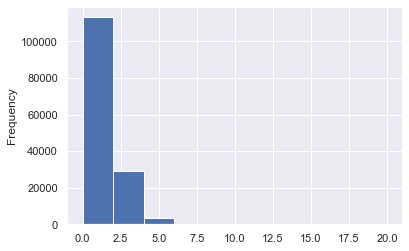

In [56]:
df['NumberOfDependents'].plot(kind='hist');

In [61]:
df['NumberOfDependents'].value_counts(normalize = True)

# ~60% of your data is people without dependents
# ~31% is with either 1 or 2 dependents
# ~10% > 3

0.000000    0.594909
1.000000    0.180153
2.000000    0.133643
3.000000    0.064918
4.000000    0.019593
5.000000    0.005107
6.000000    0.001082
7.000000    0.000349
8.000000    0.000164
9.000000    0.000034
10.000000   0.000034
13.000000   0.000007
20.000000   0.000007
Name: NumberOfDependents, dtype: float64

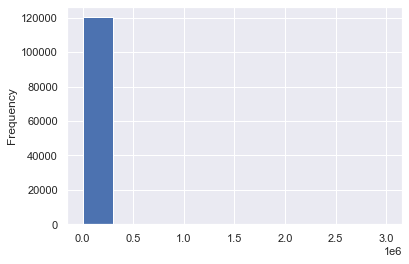

In [70]:
df['MonthlyIncome'].plot(kind='hist');

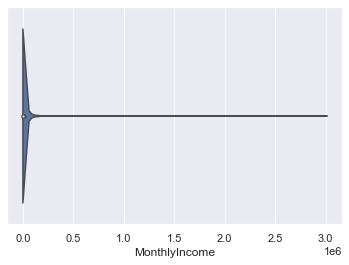

In [75]:
sns.violinplot(df['MonthlyIncome']);

In [ ]:
map(np.round, df['MonthlyIncome'])

In [80]:
#df['MonthlyIncome'].plot(kind='hist')
#np.quantile(df['MonthlyIncome'], q = [0.1, 0.2, 0.3])

seq = np.linspace(0,1,201)
pd.DataFrame(df['MonthlyIncome'].quantile(seq)).T

,0.0000,0.0050,0.0100,0.0150,0.0200,0.0250,0.0300,0.0350,0.0400,0.0450,0.0500,0.0550,0.0600,0.0650,0.0700,0.0750,0.0800,0.0850,0.0900,0.0950,0.1000,0.1050,0.1100,0.1150,0.1200,0.1250,0.1300,0.1350,0.1400,0.1450,0.1500,0.1550,0.1600,0.1650,0.1700,0.1750,0.1800,0.1850,0.1900,0.1950,0.2000,0.2050,0.2100,0.2150,0.2200,0.2250,0.2300,0.2350,0.2400,0.2450,0.2500,0.2550,0.2600,0.2650,0.2700,0.2750,0.2800,0.2850,0.2900,0.2950,0.3000,0.3050,0.3100,0.3150,0.3200,0.3250,0.3300,0.3350,0.3400,0.3450,0.3500,0.3550,0.3600,0.3650,0.3700,0.3750,0.3800,0.3850,0.3900,0.3950,0.4000,0.4050,0.4100,0.4150,0.4200,0.4250,0.4300,0.4350,0.4400,0.4450,0.4500,0.4550,0.4600,0.4650,0.4700,0.4750,0.4800,0.4850,0.4900,0.4950,0.5000,0.5050,0.5100,0.5150,0.5200,0.5250,0.5300,0.5350,0.5400,0.5450,0.5500,0.5550,0.5600,0.5650,0.5700,0.5750,0.5800,0.5850,0.5900,0.5950,0.6000,0.6050,0.6100,0.6150,0.6200,0.6250,0.6300,0.6350,0.6400,0.6450,0.6500,0.6550,0.6600,0.6650,0.6700,0.6750,0.6800,0.6850,0.6900,0.6950,0.7000,0.7050,0.7100,0.7150,0.7200,0.7250,0.7300,0.7350,0.7400,0.7450,0.7500,0.7550,0.7600,0.7650,0.7700,0.7750,0.7800,0.7850,0.7900,0.7950,0.8000,0.8050,0.8100,0.8150,0.8200,0.8250,0.8300,0.8350,0.8400,0.8450,0.8500,0.8550,0.8600,0.8650,0.8700,0.8750,0.8800,0.8850,0.8900,0.8950,0.9000,0.9050,0.9100,0.9150,0.9200,0.9250,0.9300,0.9350,0.9400,0.9450,0.9500,0.9550,0.9600,0.9650,0.9700,0.9750,0.9800,0.9850,0.9900,0.9950,1.0000
MonthlyIncome,0.0000,0.0000,0.0000,1.0000,250.0000,600.0000,800.0000,902.3800,1012.1600,1200.0000,1300.0000,1400.0000,1500.0000,1560.4200,1640.0000,1710.0000,1800.0000,1896.7800,1981.0000,2000.0000,2005.0000,2098.0000,2166.0000,2200.0000,2277.0000,2329.5000,2400.0000,2440.0000,2500.0000,2500.0000,2500.0000,2582.0000,2605.8800,2679.0000,2724.5600,2800.0000,2826.0000,2900.0000,2923.0000,3000.0000,3000.0000,3000.0000,3027.0000,3098.0000,3144.0000,3200.0000,3218.0000,3291.9800,3329.0000,3344.0000,3400.0000,3447.0000,3500.0000,3500.0000,3506.3600,3583.0000,3600.0000,3666.0000,3711.7200,3750.0000,3800.0000,3833.0000,3900.0000,3950.0000,4000.0000,4000.0000,4000.0000,4000.0000,4065.0000,4100.0000,4166.0000,4167.0000,4200.0000,4250.0000,4300.0000,4339.5000,4400.0000,4450.0000,4500.0000,4500.0000,4544.2000,4583.0000,4620.0000,4687.0000,4736.5600,4800.0000,4832.0000,4900.0000,4965.0000,5000.0000,5000.0000,5000.0000,5000.0000,5008.6200,5091.0000,5146.0000,5200.0000,5235.0000,5299.0000,5335.0000,5400.0000,5416.0000,5493.6800,5500.0000,5542.0000,5600.0000,5666.0000,5710.0000,5796.0000,5833.0000,5855.0000,5925.0000,6000.0000,6000.0000,6000.0000,6016.0000,6100.0000,6166.0000,6218.0000,6250.0000,6300.0000,6400.0000,6459.0000,6500.0000,6537.0000,6600.0000,6666.0000,6700.0000,6783.0000,6833.0000,6916.0000,7000.0000,7000.0000,7042.2200,7099.0000,7176.0000,7250.0000,7333.0000,7415.0000,7500.0000,7500.0000,7568.0000,7664.0000,7742.0000,7820.0000,7916.0000,8000.0000,8000.0000,8050.0000,8151.0000,8249.0000,8333.0000,8350.0000,8465.0000,8500.0000,8620.0000,8750.0000,8833.0000,8943.7200,9000.0000,9083.0000,9167.0000,9300.0000,9431.4200,9532.0000,9666.0000,9800.0000,9976.7800,10000.0000,10000.0000,10100.0000,10300.0000,10417.0000,10500.0000,10510.0000,10748.0000,10891.0000,11000.0000,11224.0000,11416.8600,11666.0000,11908.0000,12000.0000,12267.0000,12500.0000,12713.8000,13000.0000,13333.0000,13716.0000,14100.0000,14587.6000,15000.0000,15636.2800,16250.0000,17000.0000,18000.0000,19600.0000,21250.0000,25000.0000,35000.0000,3008750.0000


### Task 3 :There is skewness in the feature `NumberOfDependents`. So let's replace the null values in this feature with the median and let's do the same for the feature `MonthlyIncome`

In [108]:
df['NumberOfDependents']  = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

In [89]:
df.shape

(150000, 11)

### Task 4: Check for the distribution of the target variable using a `countplot()`

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

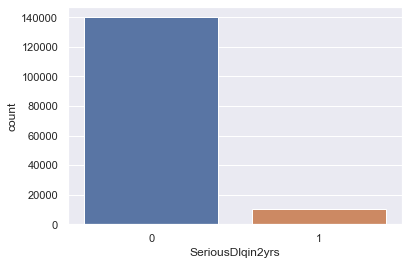

In [32]:
print(df['SeriousDlqin2yrs'].value_counts()/df['SeriousDlqin2yrs'].value_counts().sum())
sns.countplot(df['SeriousDlqin2yrs'], data=df)

### There is heavy imbalance in the target variable. We will deal with this imbalance using different techniques below

### Task 5 : Seperate the predictors and the target and split the data into training set and testing set. Keep the `test_size = 0.2` and the `random_state=42` 

In [91]:
X.shape

(150000, 10)

In [109]:
target = 'SeriousDlqin2yrs'

X = df.loc[:,df.columns!=target]
Y = df.loc[:,df.columns==target]

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [110]:
X_train.shape

(120000, 10)

In [111]:
Y_train = Y_train.SeriousDlqin2yrs.values
Y_test = Y_test.SeriousDlqin2yrs.values

In [95]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
104026,0.0000,29,0,0.0115,4342.0000,5,0,0,0,0.0000
5416,0.5955,55,0,0.8353,1833.0000,11,0,1,0,0.0000
75613,0.0000,43,0,0.0434,4166.0000,2,0,0,0,4.0000
138170,0.3920,40,0,0.0598,9000.0000,2,0,0,0,5.0000
87185,0.0000,35,0,0.1336,5800.0000,12,0,1,0,0.0000


In [35]:
#Y.SeriousDlqin2yrs.values

### Task 6 : For a better method of inference, let's check for the correlation between different features by plotting a heatmap. The basic rule of feature selection is that we need to select features which are highly correlated to the dependent variable and also not highly correlated with each other as they show the same trend. 

In [99]:
corr.shape

(10, 10)

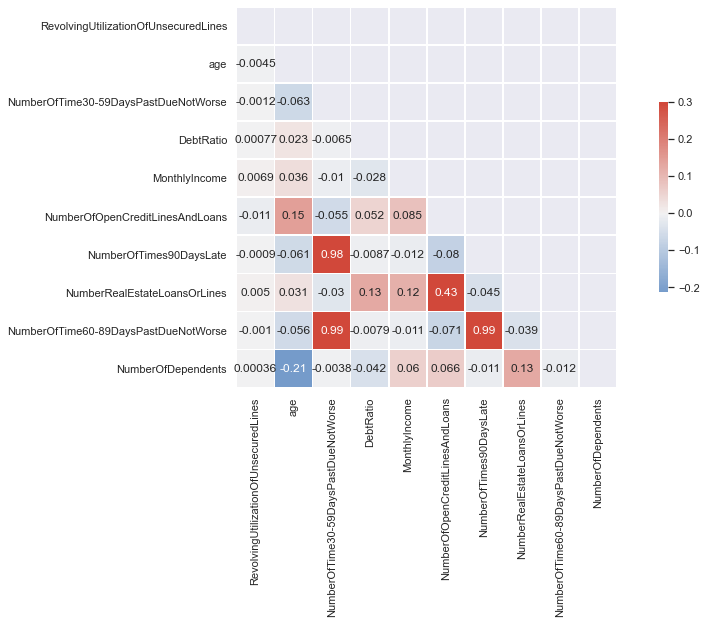

In [97]:
# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,7));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True);

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True);

In [ ]:
1. VIF plot
2. 3 models - 1 with each as feature (logistic regresison)
3. use RF or boosting with all features, use feature importance

### Task 7 : We can see that the features `NumberOfTime60-89DaysPastDueNotWorse` is highly correlated along with the features `NumberOfTime30-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`. So let's drop the features `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTime30-59DaysPastDueNotWorse` from the train as well as the test data

In [112]:
X_train.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],1,inplace=True)
X_test.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse'],1,inplace=True)

In [141]:
test_df = pd.DataFrame(columns=['model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Cohen'])

### Task 8 : Fit a vanilla Logistic Regression model on the training set and predict on the test set and plot the confusion matrix, accuracy, precision, recall and F1_score for the predicted model 

In [142]:
clf = LogisticRegression().fit(X_train, Y_train)

Y_test_pred = clf.predict(X_test)

print("Accuracy = " , accuracy_score(Y_test, Y_test_pred))
print("Precision = " ,precision_score(Y_test, Y_test_pred))
print("Recall = " ,recall_score(Y_test, Y_test_pred))
print("F1 Score = " , f1_score(Y_test, Y_test_pred))
print("cohen's kappa = " , cohen_kappa_score(Y_test, Y_test_pred))

#pd.crosstab(Y_test_pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])
pd.crosstab(Y_test_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.9349
Precision =  0.5283018867924528
Recall =  0.014314928425357873
F1 Score =  0.027874564459930314
cohen's kappa =  0.024518792573036685


Actual,0,1
Predicted,,
0,28019,1928
1,25,28


In [143]:
test_df = pd.concat([test_df, pd.DataFrame([{'model':'vanilla',
                                             'Accuracy': accuracy_score(Y_test, Y_test_pred), 
                                            'Precision': precision_score(Y_test, Y_test_pred),
                                            'Recall': recall_score(Y_test, Y_test_pred),
                                            'F1': f1_score(Y_test, Y_test_pred),
                                            'Cohen': cohen_kappa_score(Y_test, Y_test_pred)}
                                           ])
                                           ])
test_df

,model,Accuracy,Precision,Recall,F1,Cohen
0,vanilla,0.9349,0.5283,0.0143,0.0279,0.0245


### The recall is low and this is because from the matrix above, we can see that the False Negatives are too many in the data. This was supposed to happen because since the target is highly imbalanced with lesser number of 1s, our model has learnt to predict only 0s most of the times. But as per our problem, we are more concerned with the occurence of a delinquency i.e with the prediction of 1s and not 0s. Hence we have to treat this class imbalance first

### Task 9 : Set the parameter `class_weight=balanced` inside Logistic Regression and check for the metrics calculated above and also the confusion matrix

In [144]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

Y_test_pred_balanced = clf.predict(X_test)

print("Accuracy = " , accuracy_score(Y_test, Y_test_pred_balanced))
print("Precision = " ,precision_score(Y_test, Y_test_pred_balanced))
print("Recall = " ,recall_score(Y_test, Y_test_pred_balanced))
print("F1 Score = " ,f1_score(Y_test, Y_test_pred_balanced))
print("cohen's kappa = " , cohen_kappa_score(Y_test, Y_test_pred))

#pd.crosstab(Y_test_pred_balanced, Y_test[target], rownames=['Predicted'], colnames=['Actual'])
pd.crosstab(Y_test_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.8323333333333334
Precision =  0.18874038072093965
Recall =  0.47648261758691207
F1 Score =  0.2703800406150276
cohen's kappa =  0.024518792573036685


Actual,0,1
Predicted,,
0,28019,1928
1,25,28


In [145]:
test_df = pd.concat([test_df, pd.DataFrame([{'model':'class_weight',
                                             'Accuracy': accuracy_score(Y_test, Y_test_pred_balanced), 
                                            'Precision': precision_score(Y_test, Y_test_pred_balanced),
                                            'Recall': recall_score(Y_test, Y_test_pred_balanced),
                                            'F1': f1_score(Y_test, Y_test_pred_balanced),
                                            'Cohen': cohen_kappa_score(Y_test, Y_test_pred_balanced)}
                                           ])
                                           ])
test_df

,model,Accuracy,Precision,Recall,F1,Cohen
0,vanilla,0.9349,0.5283,0.0143,0.0279,0.0245
0,class_weight,0.8323,0.1887,0.4765,0.2704,0.1952


In [149]:
clf.coef_
clf.intercept_

1. inspection of coeff
2. hyper param tuning
3. scaling

array([[-2.83111166e-05, -1.36570973e-02, -9.71851637e-06,
        -1.37154171e-05,  2.81362804e-02,  8.21680186e-01,
         3.06387688e-02,  1.43961413e-01]])

array([0.0639874])

In [ ]:
Does logistic regression require feature scaling?
1. vanilla logistic regression does not scaling
2. If you are using regularisation it needs scaling

In [152]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
104026,0.0000,29,0.0115,4342.0000,5,0,0,0.0000
5416,0.5955,55,0.8353,1833.0000,11,0,1,0.0000
75613,0.0000,43,0.0434,4166.0000,2,0,0,4.0000
138170,0.3920,40,0.0598,9000.0000,2,0,0,5.0000
87185,0.0000,35,0.1336,5800.0000,12,0,1,0.0000


### We can see that the recall has increased from ~1.4% to ~63% by setting the `class_weight`, since the False Negatives have also reduced, but the Precision seems to have reduced. This is a trade-off, we have to accept. 

### By setting the class weights we got a decent recall score. But this may not be the case all the times. In such cases, will have to use other resampling methods like 
- Random Oversampling
- Random Undersampling
- Tomek Undersampling
- SMOTE 

### NOTE : All types of Undersampling and Oversampling techniques are always performed on the train data and not on the test data

### Task 10 : Perform Random Undersampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

In [153]:
from imblearn.under_sampling import RandomUnderSampler
#Code starts here

# Create random under sampler object
rus = RandomUnderSampler(random_state=0)

#Undersampling the train data
X_sample_1, y_sample_1 =  rus.fit_sample(X_train, Y_train)

In [154]:
#Initiating a logistic regression model
model_rus = LogisticRegression()

#Fitting the model with sampled data
model_rus.fit(X_sample_1, y_sample_1)

#Making prediction of test values
Y_pred=model_rus.predict(X_test)

# Calculating the necessary metrics
print("Accuracy = " , accuracy_score(Y_test, Y_pred))
print("Precision = " ,precision_score(Y_test, Y_pred))
print("Recall = " ,recall_score(Y_test, Y_pred))
print("F1 Score = " ,f1_score(Y_test, Y_pred))

#Finding the confusion matrix
#pd.crosstab(Y_pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])
pd.crosstab(Y_test_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])

#Code ends here

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy =  0.829
Precision =  0.18461844197138313
Recall =  0.47494887525562374
F1 Score =  0.2658843732112192


Actual,0,1
Predicted,,
0,28019,1928
1,25,28


In [155]:
test_df = pd.concat([test_df, pd.DataFrame([{'model':'under_sample',
                                             'Accuracy': accuracy_score(Y_test, Y_pred), 
                                            'Precision': precision_score(Y_test, Y_pred),
                                            'Recall': recall_score(Y_test, Y_pred),
                                            'F1': f1_score(Y_test, Y_pred),
                                            'Cohen': cohen_kappa_score(Y_test, Y_pred)}
                                           ])
                                           ])
test_df

,model,Accuracy,Precision,Recall,F1,Cohen
0,vanilla,0.9349,0.5283,0.0143,0.0279,0.0245
0,class_weight,0.8323,0.1887,0.4765,0.2704,0.1952
0,under_sample,0.8290,0.1846,0.4749,0.2659,0.1898


### So Random Undersampling gives a slightly better recall than just setting class_weights as balanced. Let's now see how another undersampling method called Tomek Undersampling performs 

### Task 11 : Perform Tomek Undersampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

<AxesSubplot:ylabel='count'>

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy =  0.9348666666666666
Precision =  0.5185185185185185
Recall =  0.014314928425357873
F1 Score =  0.027860696517412933


Actual,0,1
Predicted,,
0,28018,1928
1,26,28


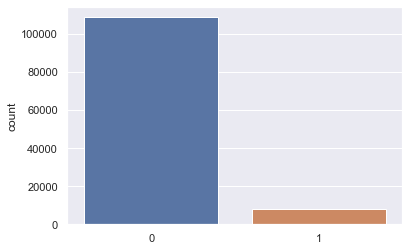

In [156]:
# Import package
from imblearn.under_sampling import TomekLinks

#Code starts here

#Initialising Tomek Links object
tl = TomekLinks()

#Undersamlpling the train data
X_sample4, y_sample4 = tl.fit_sample(X_train, Y_train)

# Plot the distribution of the target using a countplot
sns.countplot(y_sample4)

#Initialising the logistic regression model
model_tl = LogisticRegression()

#Fitting the model with sampled data
model_tl.fit(X_sample4, y_sample4)

#Making the predictions with test data
Y_pred_tomek=model_tl.predict(X_test)

# Calculating the necessary metrics
print("Accuracy = " , accuracy_score(Y_test, Y_pred_tomek))
print("Precision = " ,precision_score(Y_test, Y_pred_tomek))
print("Recall = " ,recall_score(Y_test, Y_pred_tomek))
print("F1 Score = " ,f1_score(Y_test, Y_pred_tomek))

#Finding the confusion matrix
pd.crosstab(Y_pred_tomek, Y_test,rownames=['Predicted'], colnames=['Actual'])

#Code ends here

In [157]:
test_df = pd.concat([test_df, pd.DataFrame([{'model':'tomek_undersample',
                                             'Accuracy': accuracy_score(Y_test, Y_pred_tomek), 
                                            'Precision': precision_score(Y_test, Y_pred_tomek),
                                            'Recall': recall_score(Y_test, Y_pred_tomek),
                                            'F1': f1_score(Y_test, Y_pred_tomek),
                                            'Cohen': cohen_kappa_score(Y_test, Y_pred_tomek)}
                                           ])
                                           ])
test_df

,model,Accuracy,Precision,Recall,F1,Cohen
0,vanilla,0.9349,0.5283,0.0143,0.0279,0.0245
0,class_weight,0.8323,0.1887,0.4765,0.2704,0.1952
0,under_sample,0.8290,0.1846,0.4749,0.2659,0.1898
0,tomek_undersample,0.9349,0.5185,0.0143,0.0279,0.0244


In [ ]:
1. the number of tomek links created itself might be very less
2. the data which is undersampled is very less - as good as your original dataset

### Tomek Undersampling doesn't seem a good fit for data. There is hardly any increase in recall compared to the vanilla model. Undersampling techniques, even if they provide an increase in the metric of choice, are not favoured since you tend to lose some information when you undersample the majority class of the target. Hence in most cases, what we prefer to perform are Oversampling techniques like Random Oversampling and SMOTE.

### Task 12 : Perform Random Oversampling on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

<AxesSubplot:ylabel='count'>

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy =  0.8355333333333334
Precision =  0.19133499170812604
Recall =  0.471881390593047
F1 Score =  0.27227138643067844


Actual,0,1
Predicted,,
0,24143,1033
1,3901,923


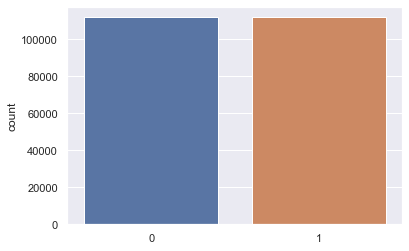

In [159]:
from imblearn.over_sampling import RandomOverSampler

#Code starts here

#Initialise the random over sampler object
ros = RandomOverSampler(random_state=0)

#Sample the train data using random over sampling method
X_sample_2, y_sample_2 = ros.fit_sample(X_train, Y_train)

# Using a countplot 
sns.countplot(y_sample_2)

#Initialising a logsitic regression model
model_ros = LogisticRegression()

#Fitting the model with train data
model_ros.fit(X_sample_2, y_sample_2)

#Making predictions of the train data
Y_pred=model_ros.predict(X_test)

# Calculating the necessary metrics
print("Accuracy = " , accuracy_score(Y_test, Y_pred))
print("Precision = " ,precision_score(Y_test, Y_pred))
print("Recall = " ,recall_score(Y_test, Y_pred))
print("F1 Score = " ,f1_score(Y_test, Y_pred))

#Finding the confusion matrix 
pd.crosstab(Y_pred, Y_test, rownames=['Predicted'], colnames=['Actual'])

#Code ends here

In [160]:
test_df = pd.concat([test_df, pd.DataFrame([{'model':'oversample',
                                             'Accuracy': accuracy_score(Y_test, Y_pred), 
                                            'Precision': precision_score(Y_test, Y_pred),
                                            'Recall': recall_score(Y_test, Y_pred),
                                            'F1': f1_score(Y_test, Y_pred),
                                            'Cohen': cohen_kappa_score(Y_test, Y_pred)}
                                           ])
                                           ])
test_df

,model,Accuracy,Precision,Recall,F1,Cohen
0,vanilla,0.9349,0.5283,0.0143,0.0279,0.0245
0,class_weight,0.8323,0.1887,0.4765,0.2704,0.1952
0,under_sample,0.8290,0.1846,0.4749,0.2659,0.1898
0,tomek_undersample,0.9349,0.5185,0.0143,0.0279,0.0244
0,oversample,0.8355,0.1913,0.4719,0.2723,0.1978


### So as you can observe from the above plot, oversampling has brought an equal balance in the distribution of classes in the target variable. Also the recall is much better compared to the vanilla model and Tomek undersampling

### Task 13 : Perform SMOTE on the train data and then fit a Logistic regression model on this undersampled data and then predict on the test data and calculate the precision, recall, accuracy, f1-score and the confusion matrix.

<AxesSubplot:ylabel='count'>

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.8093666666666667
recall: 0.4729038854805726
precision: 0.1647960092642081
f1_score: 0.24441802087462017


Actual,0,1
Predicted,,
0,23356,1031
1,4688,925


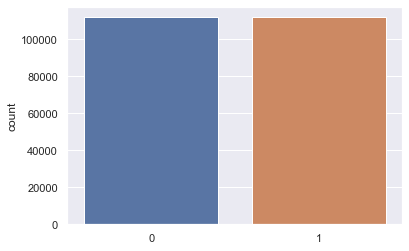

In [165]:
# Import package
from imblearn.over_sampling import SMOTE


#Initialising a SMOTE object
smote = SMOTE(random_state=12)

#Sampling the data using SMOTE
X_sample_3, y_sample_3 = smote.fit_sample(X_train, Y_train)

# Using a countplot plot the distribution of y_sample_3
sns.countplot(y_sample_3)

#Initialising Logistic Regression model
model_smote = LogisticRegression()

#Fitting the model on train data
model_smote.fit(X_sample_3, y_sample_3)

#Making predictions on test data
Y_pred=model_smote.predict(X_test)

#Finding the accuracy score 
accuracy_smote=model_smote.score(X_test,Y_test)
print("Accuracy:",accuracy_smote)       


#Finding the recall score
recall_smote=recall_score(Y_test, Y_pred)
print ("recall:",recall_smote)

#Finding the precision score
precision_smote=precision_score(Y_test, Y_pred)
print ("precision:",precision_smote)

#Finding the f1 score
f1_smote=f1_score(Y_test, Y_pred)
print ("f1_score:", f1_smote)

#Finding the confusion matrix
pd.crosstab(Y_pred,Y_test, rownames=['Predicted'], colnames=['Actual'])
#Code ends here

In [168]:
test_df = pd.concat([test_df, pd.DataFrame([{'model':'smote',
                                             'Accuracy': accuracy_score(Y_test, Y_pred), 
                                            'Precision': precision_score(Y_test, Y_pred),
                                            'Recall': recall_score(Y_test, Y_pred),
                                            'F1': f1_score(Y_test, Y_pred),
                                            'Cohen': cohen_kappa_score(Y_test, Y_pred)}
                                           ])
                                           ])
test_df

,model,Accuracy,Precision,Recall,F1,Cohen
0,vanilla,0.9349,0.5283,0.0143,0.0279,0.0245
0,class_weight,0.8323,0.1887,0.4765,0.2704,0.1952
0,under_sample,0.8290,0.1846,0.4749,0.2659,0.1898
0,tomek_undersample,0.9349,0.5185,0.0143,0.0279,0.0244
0,oversample,0.8355,0.1913,0.4719,0.2723,0.1978
0,smote,0.8094,0.1648,0.4729,0.2444,0.1635


In [ ]:
1. Get more data
2. Resampling strategies 
    1. create stack of models with different sample size and sample ratio of majority and minority
3. Try another algorith - Tree based
4. Remove your outliers and then model
5. scale features
6. Hyperparam

### SMOTE performs on par with Random Oversampling giving almost the same recall ! 